# **Bottle Deep Learning Version**

**Benedictus Bayu Pramudhito**

**Deeper, Wider, Wider SGD, Wider RMSprop**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import os
print('\n'.join(os.listdir(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)')))

bottle.csv
References
Untitled0.ipynb
Week_1_Python_1.ipynb
heart.csv
pima-indians-diabetes.csv
sonar.csv
housing.csv
winequality-white.csv
auto.csv
sales.csv
birth.csv
shampoo.csv
daily-min-temperatures.csv
Quiz
customer.csv
iris.csv
iris (1).csv
Bootcamp Images
parkinsons
numbers_dataset
bottle-updated.csv
auto-mpg.csv
auto (1).csv


In [5]:
df = pd.read_csv(r'./drive/My Drive/Colab Test (Bootcamp ML 2020)/bottle-updated.csv')
df.head()

,Unnamed: 0,Depthm,T_degC,Salnty
0,0,0,10.50,33.440
1,1,8,10.46,33.440
2,2,10,10.46,33.437
3,3,19,10.45,33.420
4,4,20,10.45,33.421


In [6]:
df.shape

(864863, 4)

In [7]:
df.dtypes

Unnamed: 0      int64
Depthm          int64
T_degC        float64
Salnty        float64
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,864863.0,432431.000000,249664.587267,0.000,216215.500,432431.000,648646.5000,864862.000
Depthm,864863.0,226.831951,316.050259,0.000,46.000,125.000,300.0000,5351.000
T_degC,853900.0,10.799677,4.243825,1.440,7.680,10.060,13.8800,31.140
Salnty,817509.0,33.840350,0.461843,28.431,33.488,33.863,34.1969,37.034


In [9]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df.head()

,Depthm,T_degC,Salnty
0,0,10.50,33.440
1,8,10.46,33.440
2,10,10.46,33.437
3,19,10.45,33.420
4,20,10.45,33.421


In [11]:
print(df.dtypes)
df.shape

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object


(864863, 3)

In [12]:
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,47354,5.48
1,T_degC,10963,1.27
2,Depthm,0,0.00


In [13]:
df.dropna(subset=['Salnty'], inplace=True)

In [14]:
#Isi missing values
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i].fillna(df[i].mode().mean(), inplace=True)
    print('Filled', i)

Filled T_degC


In [15]:
#Cek ulang missing valuesnya
nulls = df.isnull().sum().sort_values(ascending=False)
percent = round(nulls/len(df)*100, 2)

df_null = pd.DataFrame(columns=['Features', 'Total', 'Percent'])
df_null['Features'] = nulls.index
df_null['Total'] = nulls.values
df_null['Percent'] = percent.values

df_null

,Features,Total,Percent
0,Salnty,0,0.0
1,T_degC,0,0.0
2,Depthm,0,0.0


In [16]:
df.dtypes

Depthm      int64
T_degC    float64
Salnty    float64
dtype: object

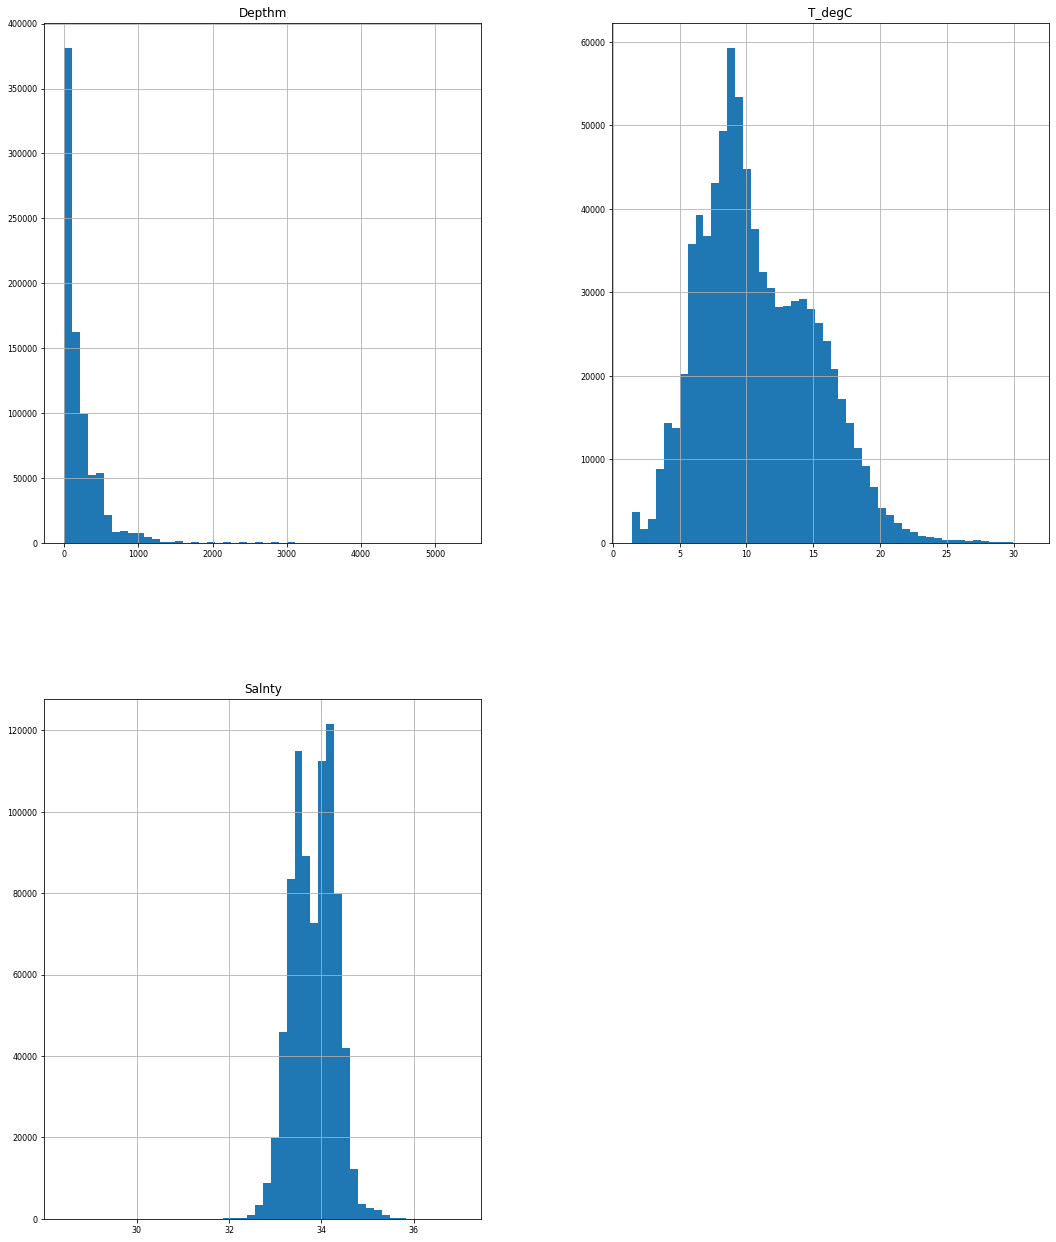

In [17]:
df_numbers = df.select_dtypes(include=['float64', 'int64'])

df_numbers.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

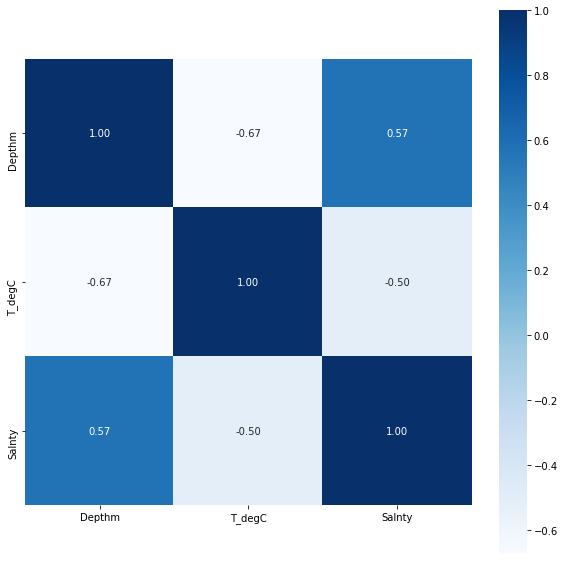

In [18]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cbar=True, square=True, fmt='.2f', cmap='Blues')
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
X = df.drop(['Salnty'], axis=1)
y = df['Salnty']

In [21]:
stdr = StandardScaler()

X = stdr.fit_transform(X.values)
y = stdr.fit_transform(df['Salnty'].values.reshape(-1, 1)).flatten()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## **Deep Learning Model with Deeper Layer**

In [23]:
def plot_loss_new(history):
  history_df = pd.DataFrame(history.history)

  min_loss_index = history_df[history_df['loss']==min(history_df['loss'])].index.values
  min_loss = history_df.loc[min_loss_index]['loss']
  min_val_loss_index = history_df[history_df['val_loss']==min(history_df['val_loss'])].index.values
  min_val_loss = history_df.loc[min_val_loss_index]['val_loss']

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.plot(min_loss_index, min_loss, 'o', c='k', ms=4, label='min loss')
  plt.plot(min_val_loss_index, min_val_loss, 'o', c='k', ms=4, label='min val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  print('Minimum Loss             :', min_loss)
  print()
  print('Minimum Validation Loss  :', min_val_loss)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(13, input_dim=2, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
history1 = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 79s 1ms/step - loss: 0.3140 - val_loss: 0.2987
Epoch 2/50
76642/76642 [==============================] - 80s 1ms/step - loss: 0.3034 - val_loss: 0.2975
Epoch 3/50
76642/76642 [==============================] - 86s 1ms/step - loss: 0.3021 - val_loss: 0.2975
Epoch 4/50
76642/76642 [==============================] - 79s 1ms/step - loss: 0.3016 - val_loss: 0.2968
Epoch 5/50
76642/76642 [==============================] - 80s 1ms/step - loss: 0.3010 - val_loss: 0.3075
Epoch 6/50
76642/76642 [==============================] - 81s 1ms/step - loss: 0.3007 - val_loss: 0.2977
Epoch 7/50
76642/76642 [==============================] - 81s 1ms/step - loss: 0.3005 - val_loss: 0.2950
Epoch 8/50
76642/76642 [==============================] - 79s 1ms/step - loss: 0.3000 - val_loss: 0.2960
Epoch 9/50
76642/76642 [==============================] - 80s 1ms/step - loss: 0.2993 - val_loss: 0.2955
Epoch 10/50
76642/76642 [==============================

In [28]:
predict_deep = model.predict(X_test)
predict_deep = predict_deep.flatten()

In [29]:
mse = mean_squared_error(y_test, predict_deep)
mae = mean_absolute_error(y_test, predict_deep)
r2 = r2_score(y_test, predict_deep)
print("MSE (Mean Squared Error)         :", mse)
print("MAE (Mean Absolute Error)        :", mae)
print("r^2 score                        :", r2)
print('RMSE (Root Mean Squared Error)   :', np.sqrt(mean_squared_error(y_test, predict_deep)))

MSE (Mean Squared Error)         : 0.2946604961477956
MAE (Mean Absolute Error)        : 0.3509662516585396
r^2 score                        : 0.7043312743992796
RMSE (Root Mean Squared Error)   : 0.5428263959571196


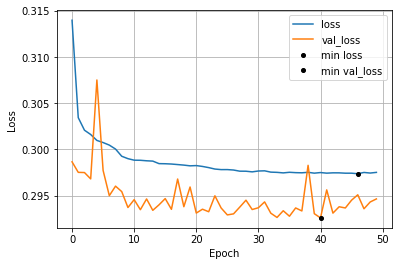

Minimum Loss             : 46    0.29738
Name: loss, dtype: float64

Minimum Validation Loss  : 40    0.29261
Name: val_loss, dtype: float64


In [30]:
plot_loss_new(history1)

Sweet spot berada pada epoch 40 dengan val_loss 0.29261

## **Deep Learning with Wider Layer**

In [31]:
wider = Sequential()
wider.add(Dense(20, input_dim=2, kernel_initializer='normal', activation='relu'))
wider.add(Dense(1, kernel_initializer='normal'))

wider.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
wider.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [33]:
history2 = wider.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
76642/76642 [==============================] - 73s 950us/step - loss: 0.3399 - val_loss: 0.3161
Epoch 2/50
76642/76642 [==============================] - 71s 930us/step - loss: 0.3153 - val_loss: 0.3063
Epoch 3/50
76642/76642 [==============================] - 71s 926us/step - loss: 0.3106 - val_loss: 0.3057
Epoch 4/50
76642/76642 [==============================] - 71s 930us/step - loss: 0.3099 - val_loss: 0.3096
Epoch 5/50
76642/76642 [==============================] - 74s 962us/step - loss: 0.3083 - val_loss: 0.3009
Epoch 6/50
76642/76642 [==============================] - 71s 926us/step - loss: 0.3062 - val_loss: 0.3087
Epoch 7/50
76642/76642 [==============================] - 72s 941us/step - loss: 0.3042 - val_loss: 0.2989
Epoch 8/50
76642/76642 [==============================] - 72s 943us/step - loss: 0.3030 - val_loss: 0.2969
Epoch 9/50
76642/76642 [==============================] - 74s 964us/step - loss: 0.3027 - val_loss: 0.2968
Epoch 10/50
76642/76642 [============

In [34]:
predict_wide = wider.predict(X_test)
predict_wide = predict_wide.flatten()

In [35]:
mse = mean_squared_error(y_test, predict_wide)
mae = mean_absolute_error(y_test, predict_wide)
r2 = r2_score(y_test, predict_wide)
print("MSE (Mean Squared Error)       :", mse)
print("MAE (Mean Absolute Error)      :", mae)
print("r^2 score                      :", r2)
print('RMSE (Root Mean Squared Error  :', np.sqrt(mean_squared_error(y_test, predict_wide)))

MSE (Mean Squared Error)       : 0.29579722124947566
MAE (Mean Absolute Error)      : 0.3534510487241258
r^2 score                      : 0.7031906598053114
RMSE (Root Mean Squared Error  : 0.543872431043784


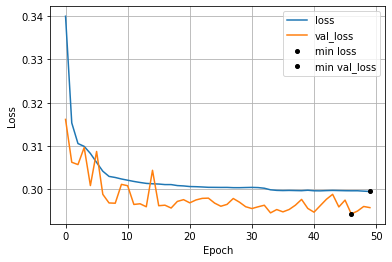

Minimum Loss             : 49    0.299516
Name: loss, dtype: float64

Minimum Validation Loss  : 46    0.294346
Name: val_loss, dtype: float64


In [36]:
plot_loss_new(history2)

Sweet spot berada pada epoch 46 dengan val_loss 0.294346